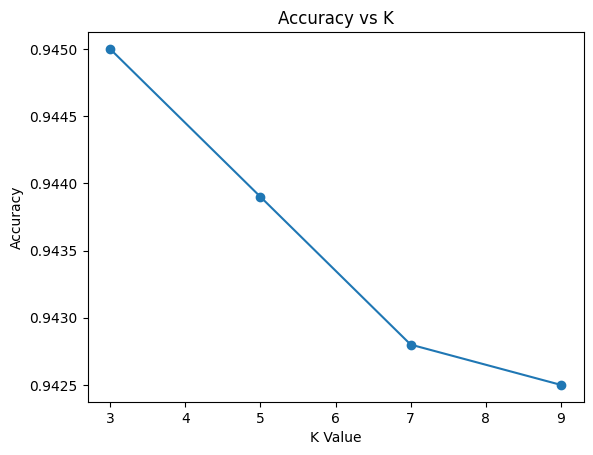

Best K: 3
Final Accuracy: 0.945
Confusion Matrix:
 [[ 967    0    1    3    0    4    5    0    0    0]
 [   0 1127    3    0    1    0    3    0    1    0]
 [  13    9  966   15    2    0    5   11    9    2]
 [   0    4    5  964    2   14    0   11    8    2]
 [   1    9    5    2  922    2    7    4    3   27]
 [   6    1    6   21    4  828   11    2    5    8]
 [  13    4    2    0    3    9  925    0    2    0]
 [   0   22   12    4    7    2    0  953    1   27]
 [  16    3    9   24   11   22    3    7  872    7]
 [   5    6    6   11   17    7    0   28    3  926]]


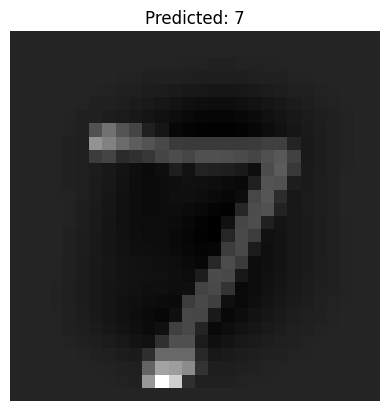

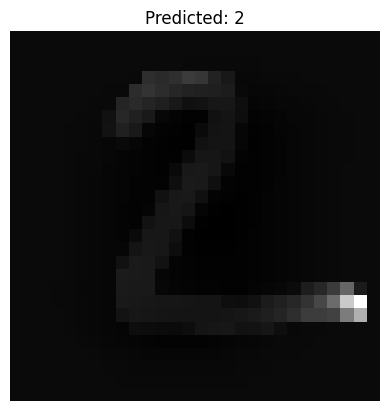

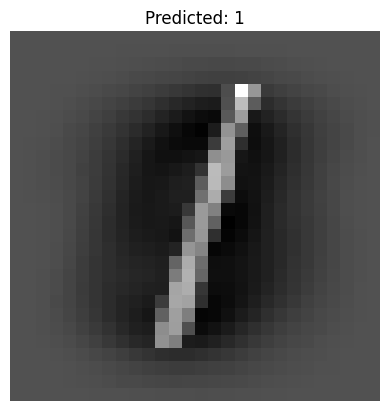

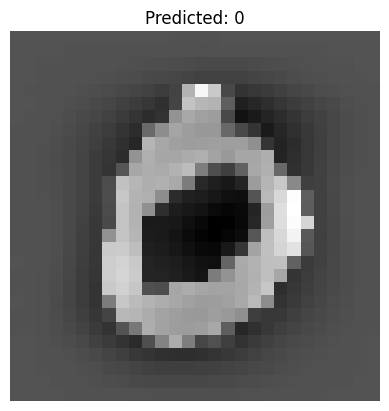

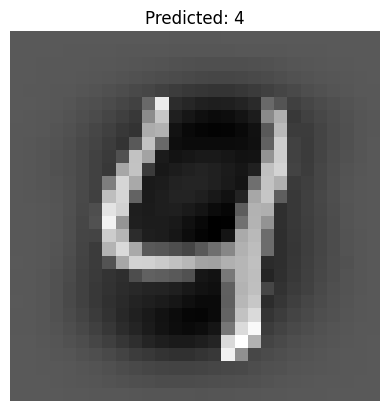

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

train = pd.read_csv("mnist_train.csv", encoding="latin1")
test = pd.read_csv("mnist_test.csv", encoding="latin1")

train = train.fillna(0)
test = test.fillna(0)

X_train = train.iloc[:, 1:].values
y_train = train.iloc[:, 0].values

X_test = test.iloc[:, 1:].values
y_test = test.iloc[:, 0].values

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

k_values = [3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, preds))

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()

best_k = k_values[np.argmax(accuracies)]
print("Best K:", best_k)

final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)
final_preds = final_model.predict(X_test)

print("Final Accuracy:", accuracy_score(y_test, final_preds))

cm = confusion_matrix(y_test, final_preds)
print("Confusion Matrix:\n", cm)

for i in range(5):
    img = X_test[i].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {final_preds[i]}")
    plt.axis('off')
    plt.show()
